# Comparing Values in Jupyter
***

The end goal of any science experiment is to get some interesting *value* and compare it to what we've already known. <br>
For example, imagine you are Adam Reiss. Your job is to measure the rate at which the Universe expands, the Hubble constant. You have recently obtained a new value:

$$H_0^{AR} = 73.52 \pm 1.62 \textrm{ (km/s) / Mpc} $$

In [1]:
H0_reiss  = 73.52
dH0_reiss = 1.62 

Your competitor, Chuck Bennett (who also happens to be in the office next to yours), measured a different value using a different method:

$$H_0^{CB} = 69.32 \pm 0.80 \textrm{ (km/s) / Mpc} $$

In [2]:
H0_bennett  = 69.32
dH0_bennett = 0.80

### Method 1: Looking at the uncertainties

There are numerous ways to compare one number to another. You already know a couple of them back from Lab 0. The simplest thing to do is to look at the two numbers, and see if they fall within each other's uncertainty.

In our example, we know that

$$ H_0^{AR} \in (71.90, 75.14) \textrm{ (km/s) / Mpc} $$
$$ H_0^{CB} \in (68.52, 70.12) \textrm{ (km/s) / Mpc} $$

These ranges do not overlap, so we say the measurements are not consistent!

### Method 2: Plotting the values to compare

A great visual way to do the same thing is using a **comparison plot** (*see Taylor pp. 10-11*). <br>
Let's see how to do this in Python. First, we import the MatPlotLib library, as before.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Although we didn't say this explicitly, but we have already encountered the idea of plotting *names* instead of *numbers* on the x-axis, back in Lab 1 notebook. You can simply set your x-values as a list of whatever object names you want to plot:

In [4]:
xs = ["Reiss H0", "Bennett H0"]

Now, we can use the **errorbar()** plot as before to plot the two values side by side and compare them.

Text(0,0.5,'Hubble Constant [ (km/s) / Mpc ]')

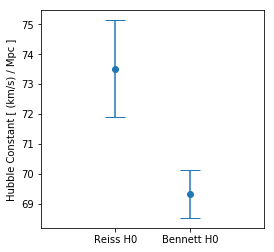

In [5]:
ys  = [H0_reiss,  H0_bennett]
dys = [dH0_reiss, dH0_bennett] 

plt.figure(figsize=(4,4))
plt.xlim(-1, 2)

plt.errorbar(xs, ys, yerr=dys, fmt="o", capsize=10)
plt.ylabel("Hubble Constant [ (km/s) / Mpc ]")

Since the error bars on the plot do not overlap, we can say that the values are **not compatible**. Essentially, this is the same method as Method 1, except it's more visual and easier to understand.

You probably notices two commands you haven't seen before on this plot. You don't need them, but I think they make the plot look nicer.

- `figure()` creates an empty plot. You don't need this command as simply trying to plot something will create a figure as well, but using `figure()` allows you to set **figure size** using `figsize = (width, height)` argument. 
- `xlim()` or `ylim()` sets the x- and y-limit of the plot. Although I am plotting *names* on the x-axis, MatPlotLib assigns them locations: 0 and 1. I changed the xlimit to (-1, 2) so that the two data points are closer together.


**Exercise: try commenting plt.figure() and plt.xlim() lines out and see what changes!**


### Method 3: Looking at the difference

Some of you used a different method in Lab 0: looking at the difference between the values. 

Most of the time, the difference between any two consisten measurements will not be 0. However, when you account for uncertainties in both measurements, the difference should be **consistent** with 0, i.e. 0 should be within the allowed error on the difference.

The uncertainty in the difference is simply the sum of the uncertainties in the measurement (a quadrature sum, to be precise). <br>

$$ \textrm{Diff} = \big|H_0^{AR}-H_0^{CB}\big|$$ <br>
$$ \delta \textrm{Diff} = \sqrt{(\delta H_0^{AR})^2 + (\delta H_0^{CB})^2} $$

We want to check if the range of all possible difference values within our uncertainty (Diff - $\delta$Diff, Delta + $\delta$Diff) contains 0.

In [6]:
diff  = abs( H0_reiss - H0_bennett )
ddiff = pow( dH0_reiss**2 + dH0_bennett**2, 0.5 )  # Square root of the uncertainties

print("Difference = %2.1f +/- %2.1f (km/s) / Mpc" % (diff, ddiff))

Difference = 4.2 +/- 1.8 (km/s) / Mpc


This tells us that the measurements are *not compatible*.

You might have noticed that **Methods 1 and 2** are *very similar*, but they are not exactly the same! Since we calculate the uncertainty on $\delta \textrm{Diff}$ using *quadrature*, the uncertainty is ***smaller*** than the sum of error bars. 
You can see this if we compare the error bars side by side:

<img src="images/error_bars.png">

So comparing the two values using their difference is more strict, but also more correct! :)

Comparing your experimental value to a published one, or one model to another, is really the cornerstone of modern science. There are a lot more sophisticated ways of doing so, and no paper nowadays gets published after doing a series of statistical tests to figure out if their model is compatible with other researchers'. We will learn a really powerful technique of ***statistical significance*** later on in the course, so stay tuned.

But even with these simple techniques, we can already get a glance at a problem that's bothering hundreds of astronomers nowadays: why is it that Adam Reis' and Chuck Bennett's numbers are not compatible? They are measuring the same thing, using different methods! Is there some new physics we're missing that one of the methods doesn't account for?

Hopefully we'll find out soon :)